In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from scipy import stats
import analysis_perDRG
import scikit_posthocs as sp

In [2]:
name = 'd14LperDRG_'

with open('D14_SNI_area.json') as f:
    results_sni = json.load(f)
with open('D14_Sham_area.json') as f:
    results_sham = json.load(f)

In [3]:
sham_l4il = analysis_perDRG.GroupData(results_sham, 'L4IL', number_of_rats=6)
sham_l4cl = analysis_perDRG.GroupData(results_sham, 'L4CL', number_of_rats=6)

sni_l4il = analysis_perDRG.GroupData(results_sni, 'L4IL', number_of_rats=6)
sni_l4cl = analysis_perDRG.GroupData(results_sni, 'L4CL', number_of_rats=6)

sham_l5il = analysis_perDRG.GroupData(results_sham, 'L5IL', number_of_rats=5)
sham_l5cl = analysis_perDRG.GroupData(results_sham, 'L5CL', number_of_rats=5)

sni_l5il = analysis_perDRG.GroupData(results_sni, 'L5IL', number_of_rats=5)
sni_l5cl = analysis_perDRG.GroupData(results_sni, 'L5CL', number_of_rats=5)

In [4]:
def statistic_all(feature):

    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    
    statistic, p_value_a1 = stats.shapiro(group_a1_data)
    statistic, p_value_a2 = stats.shapiro(group_a2_data)
    statistic, p_value_b1 = stats.shapiro(group_b1_data)
    statistic, p_value_b2 = stats.shapiro(group_b2_data)
    statistic, p_value_c1 = stats.shapiro(group_c1_data)
    statistic, p_value_c2 = stats.shapiro(group_c2_data)
    statistic, p_value_d1 = stats.shapiro(group_d1_data)
    statistic, p_value_d2 = stats.shapiro(group_d2_data)
    
    p_values_shapiro = [p_value_a1, p_value_a2, p_value_b1, p_value_b2, p_value_c1, p_value_c2, p_value_d1, p_value_d2]
    
    if any(i < 0.05 for i in p_values_shapiro):
        statistic, p_value = stats.kruskal(group_a1_data, group_b1_data, group_c1_data, group_d1_data,
                                           group_a2_data, group_b2_data, group_c2_data, group_d2_data, nan_policy='omit')
        print('Mann Whitney U: p-value='+"{:.5f}".format(p_value))
        stat = sp.posthoc_mannwhitney([group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data])
    else:
        # data is normally distributed
        # test for equal variance
        statistic, p_value = stats.bartlett(pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                            pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna())
        if p_value < 0.05:
            # no equal variance
            equal_variance = False
            # tests the equality of k independent means in the face of heterogeneity of variance
            statistic, p_value = stats.alexandergovern([group_a1_data, group_b1_data, group_c1_data, group_d1_data,
                                                        group_a2_data, group_b2_data, group_c2_data, group_d2_data], nan_policy='omit')
            print('Welch’s t-test: p-value='+"{:.5f}".format(p_value))
 
        else: 
            #data is normally distributed and have equal variances
            equal_variance = True
            statistic, p_value = stats.f_oneway(pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                                pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna())
            print('one-way ANOVA: p-value='+"{:.5f}".format(p_value))
        stat = sp.posthoc_ttest([pd.Series(group_a1_data).dropna(), pd.Series(group_b1_data).dropna(), pd.Series(group_c1_data).dropna(), pd.Series(group_d1_data).dropna(),
                                 pd.Series(group_a2_data).dropna(), pd.Series(group_b2_data).dropna(), pd.Series(group_c2_data).dropna(), pd.Series(group_d2_data).dropna()], equal_var=equal_variance) 
    
    
    stat.columns = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    stat.index = ['Sham L4IL', 'Sham L5IL', 'Sham L4CL', 'Sham L5CL', 'SNI L4IL', 'SNI L5IL', 'SNI L4CL', 'SNI L5CL']
    return stat.round(4)

In [5]:
def plot_all(feature, ylabel):
    group_a1_data = getattr(sham_l4il, feature)
    group_a2_data = getattr(sham_l5il, feature)
    group_b1_data = getattr(sham_l4cl, feature)
    group_b2_data = getattr(sham_l5cl, feature)
    group_c1_data = getattr(sni_l4il, feature)
    group_c2_data = getattr(sni_l5il, feature)
    group_d1_data = getattr(sni_l4cl, feature) 
    group_d2_data = getattr(sni_l5cl, feature)
    #statistic(group_a_data, group_b_data)
    
    plt.figure(figsize=(24,8))
    
    labels=['Sham\nL4IL', 'Sham\nL5IL', 'Sham\nL4CL', 'Sham\nL5CL', 'SNI\nL4IL', 'SNI\nL5IL', 'SNI\nL4CL', 'SNI\nL5CL']

    c='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 5
    fontsize = 32
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(length=10, width=linewidth)
    #ax.set_xlim([0, 100])
    if 'Neurons/' in ylabel:
        ax.set_ylim([-1, 400])
    else:
        ax.set_ylim([-1, 101])
    plt.xticks(fontname="Arial", fontsize=fontsize)
    plt.yticks(fontname="Arial", fontsize=fontsize)


    plt.ylabel(ylabel, fontname="Arial", fontsize=34)

    

    sns.boxplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data], 
                width=0.5, palette='Blues', whiskerprops=line_props, boxprops=bbox_props,
                capprops=cap_props, medianprops=median_props, fliersize=0)
    sns.stripplot(data=[group_a1_data, group_a2_data, group_b1_data, group_b2_data, group_c1_data, group_c2_data, group_d1_data, group_d2_data],
                  jitter=0.2, dodge=True, size=8, marker='o', palette='tab20c')
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=34)
    
    plt.savefig('Boxplots d14 L/' + name+feature+'.png', bbox_inches = "tight")
    plt.show()

### L4 vs L5

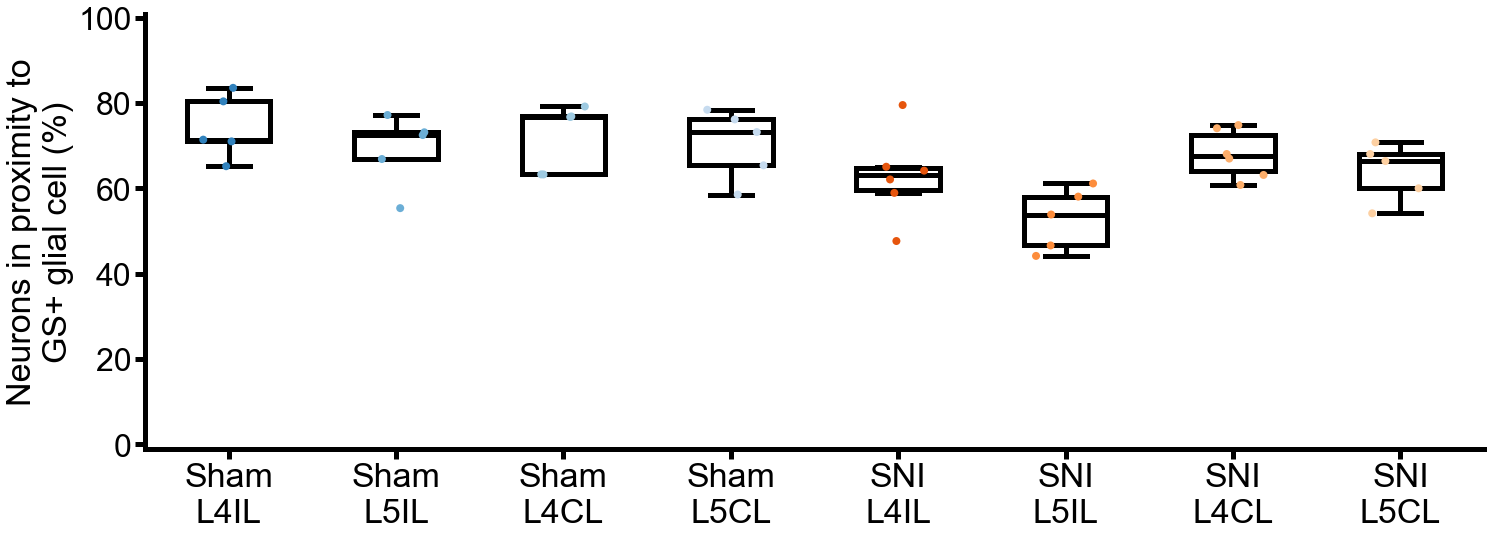

In [6]:
plot_all('ring_ratios_gs', 'Neurons in proximity to\nGS+ glial cell (%)')

In [7]:
statistic_all('ring_ratios_gs')

Mann Whitney U: p-value=0.02309


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.6905,0.5476,0.6905,0.0303,0.0079,0.2468,0.0556
Sham L5IL,0.6905,1.0000,0.6905,0.6905,0.3290,0.0317,0.9307,0.2222
Sham L4CL,0.5476,0.6905,1.0000,0.6905,0.3290,0.0079,0.2468,0.2222
Sham L5CL,0.6905,0.6905,0.6905,1.0000,0.3290,0.0159,0.6623,0.3095
SNI L4IL,0.0303,0.3290,0.3290,0.3290,1.0000,0.0519,0.3095,0.6623
SNI L5IL,0.0079,0.0317,0.0079,0.0159,0.0519,1.0000,0.0087,0.0556
SNI L4CL,0.2468,0.9307,0.2468,0.6623,0.3095,0.0087,1.0000,0.4286
SNI L5CL,0.0556,0.2222,0.2222,0.3095,0.6623,0.0556,0.4286,1.0000


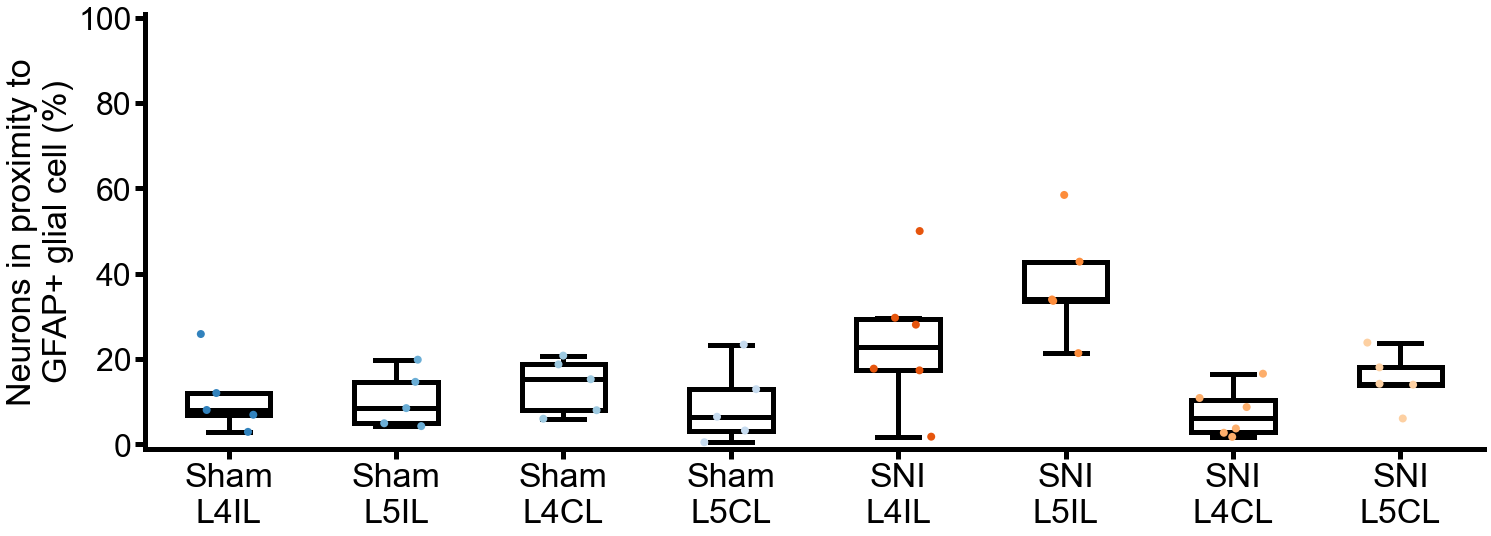

In [8]:
plot_all('ring_ratios_gfap', 'Neurons in proximity to\nGFAP+ glial cell (%)')

In [9]:
statistic_all('ring_ratios_gfap')

one-way ANOVA: p-value=0.00030


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.6105,0.1449,0.4150,0.8881,0.7517,0.0062,0.4308
Sham L5IL,0.6105,1.0000,0.2144,0.1188,0.4490,0.3997,0.0073,0.7308
Sham L4CL,0.1449,0.2144,1.0000,0.0379,0.1123,0.1031,0.1617,0.2811
Sham L5CL,0.4150,0.1188,0.0379,1.0000,0.4361,0.6822,0.0007,0.0626
SNI L4IL,0.8881,0.4490,0.1123,0.4361,1.0000,0.8271,0.0037,0.2836
SNI L5IL,0.7517,0.3997,0.1031,0.6822,0.8271,1.0000,0.0045,0.2707
SNI L4CL,0.0062,0.0073,0.1617,0.0007,0.0037,0.0045,1.0000,0.0099
SNI L5CL,0.4308,0.7308,0.2811,0.0626,0.2836,0.2707,0.0099,1.0000


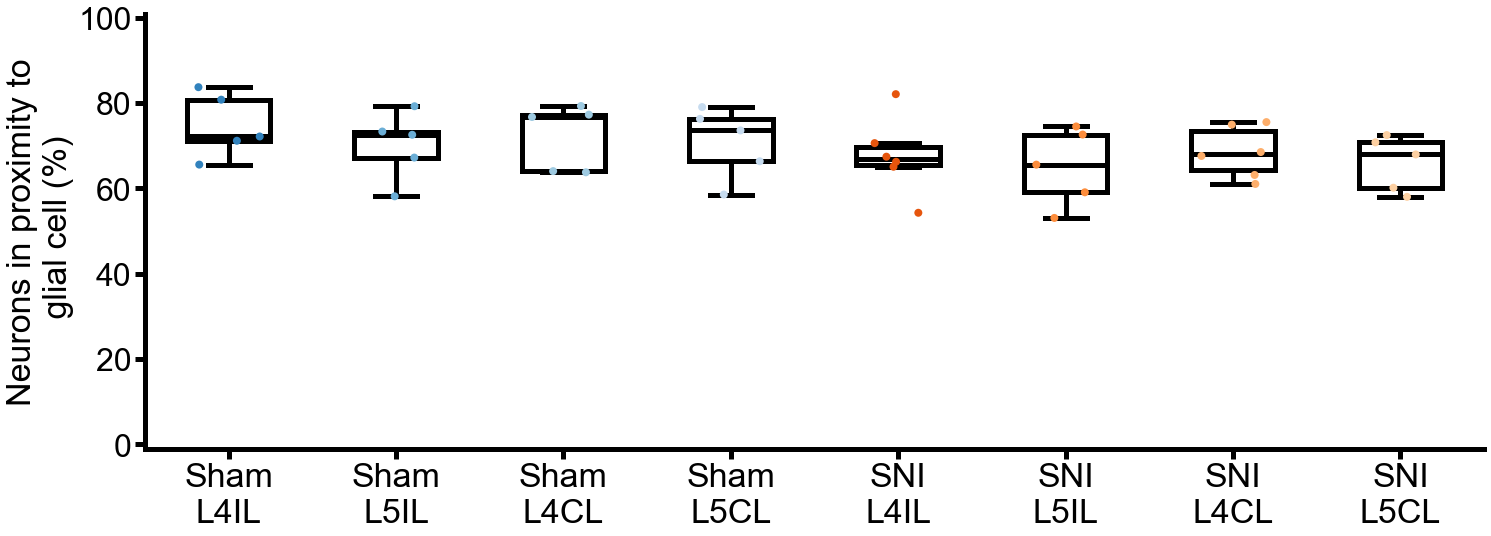

In [10]:
plot_all('ring_ratios_ring', 'Neurons in proximity to\n glial cell (%)')

In [11]:
statistic_all('ring_ratios_ring')

one-way ANOVA: p-value=0.52803


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.6206,0.1951,0.1563,0.3735,0.4547,0.1003,0.0805
Sham L5IL,0.6206,1.0000,0.3900,0.3816,0.6779,0.7801,0.2077,0.1943
Sham L4CL,0.1951,0.3900,1.0000,0.8515,0.6424,0.5644,0.6390,0.7271
Sham L5CL,0.1563,0.3816,0.8515,1.0000,0.7038,0.6043,0.4597,0.5070
SNI L4IL,0.3735,0.6779,0.6424,0.7038,1.0000,0.9001,0.3676,0.3830
SNI L5IL,0.4547,0.7801,0.5644,0.6043,0.9001,1.0000,0.3214,0.3292
SNI L4CL,0.1003,0.2077,0.6390,0.4597,0.3676,0.3214,1.0000,0.8589
SNI L5CL,0.0805,0.1943,0.7271,0.5070,0.3830,0.3292,0.8589,1.0000


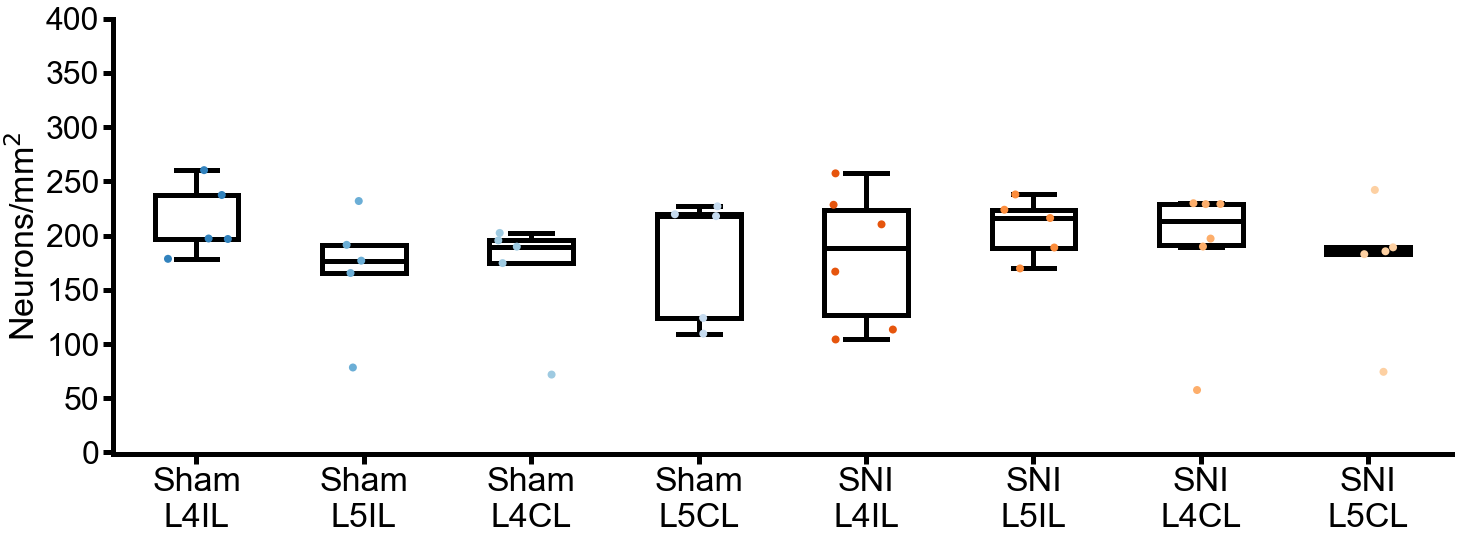

In [12]:
plot_all('neurons_per_tissue', 'Neurons/mm$^2$')

In [13]:
statistic_all('neurons_per_tissue')

Mann Whitney U: p-value=0.71354


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.0947,0.1437,0.5309,0.4113,0.8345,0.6481,0.2963
Sham L5IL,0.0947,1.0000,1.0000,0.8345,0.7842,0.2963,0.5228,0.8345
Sham L4CL,0.1437,1.0000,1.0000,0.4034,0.6481,0.2963,0.2353,1.0000
Sham L5CL,0.5309,0.8345,0.4034,1.0000,0.9273,0.6761,0.5228,0.8345
SNI L4IL,0.4113,0.7842,0.6481,0.9273,1.0000,0.5228,0.6889,0.9273
SNI L5IL,0.8345,0.2963,0.2963,0.6761,0.5228,1.0000,0.9273,0.5309
SNI L4CL,0.6481,0.5228,0.2353,0.5228,0.6889,0.9273,1.0000,0.4113
SNI L5CL,0.2963,0.8345,1.0000,0.8345,0.9273,0.5309,0.4113,1.0000


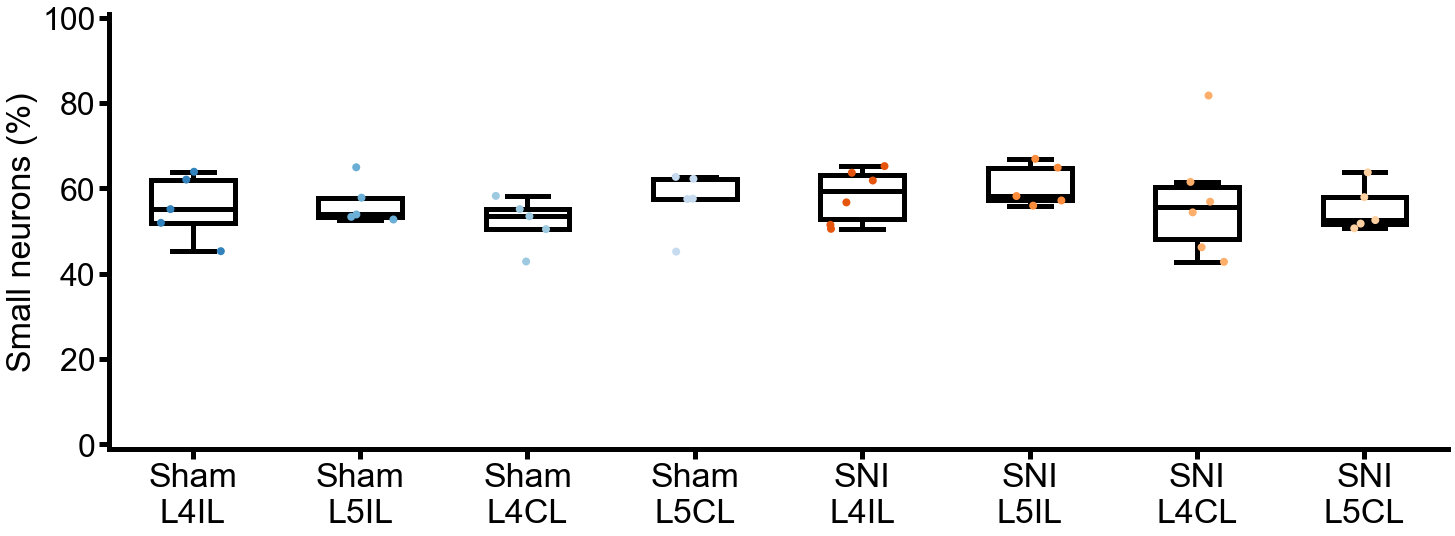

In [14]:
plot_all('small_neurons_percentage', 'Small neurons (%)')

In [15]:
statistic_all('small_neurons_percentage')

one-way ANOVA: p-value=0.81643


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.4220,0.5532,0.8240,0.8357,0.7735,0.2554,0.9389
Sham L5IL,0.4220,1.0000,0.1278,0.4545,0.2306,0.2570,0.0364,0.3846
Sham L4CL,0.5532,0.1278,1.0000,0.8774,0.6402,0.7736,0.5098,0.4407
Sham L5CL,0.8240,0.4545,0.8774,1.0000,0.9157,0.9760,0.6201,0.7781
SNI L4IL,0.8357,0.2306,0.6402,0.9157,1.0000,0.9003,0.2342,0.7276
SNI L5IL,0.7735,0.2570,0.7736,0.9760,0.9003,1.0000,0.3804,0.6798
SNI L4CL,0.2554,0.0364,0.5098,0.6201,0.2342,0.3804,1.0000,0.1471
SNI L5CL,0.9389,0.3846,0.4407,0.7781,0.7276,0.6798,0.1471,1.0000


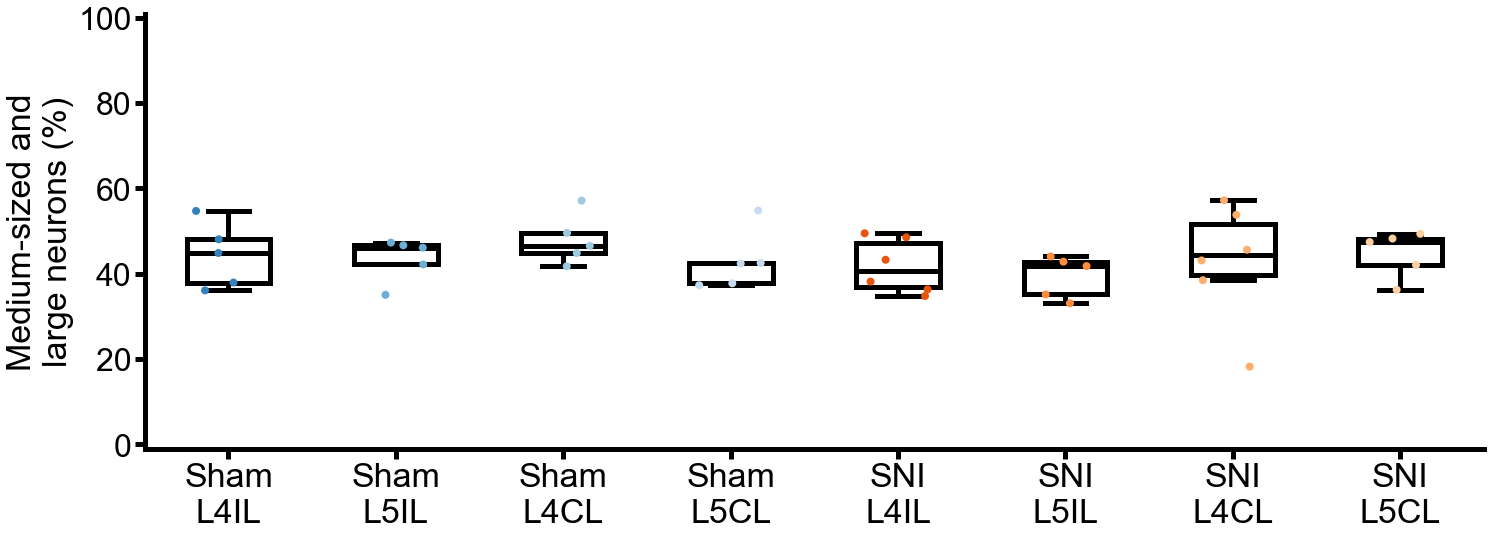

In [16]:
plot_all('bigger_neurons_percentage', 'Medium-sized and\nlarge neurons (%)')

In [17]:
statistic_all('bigger_neurons_percentage')

one-way ANOVA: p-value=0.81643


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.4220,0.5532,0.8240,0.8357,0.7735,0.2554,0.9389
Sham L5IL,0.4220,1.0000,0.1278,0.4545,0.2306,0.2570,0.0364,0.3846
Sham L4CL,0.5532,0.1278,1.0000,0.8774,0.6402,0.7736,0.5098,0.4407
Sham L5CL,0.8240,0.4545,0.8774,1.0000,0.9157,0.9760,0.6201,0.7781
SNI L4IL,0.8357,0.2306,0.6402,0.9157,1.0000,0.9003,0.2342,0.7276
SNI L5IL,0.7735,0.2570,0.7736,0.9760,0.9003,1.0000,0.3804,0.6798
SNI L4CL,0.2554,0.0364,0.5098,0.6201,0.2342,0.3804,1.0000,0.1471
SNI L5CL,0.9389,0.3846,0.4407,0.7781,0.7276,0.6798,0.1471,1.0000


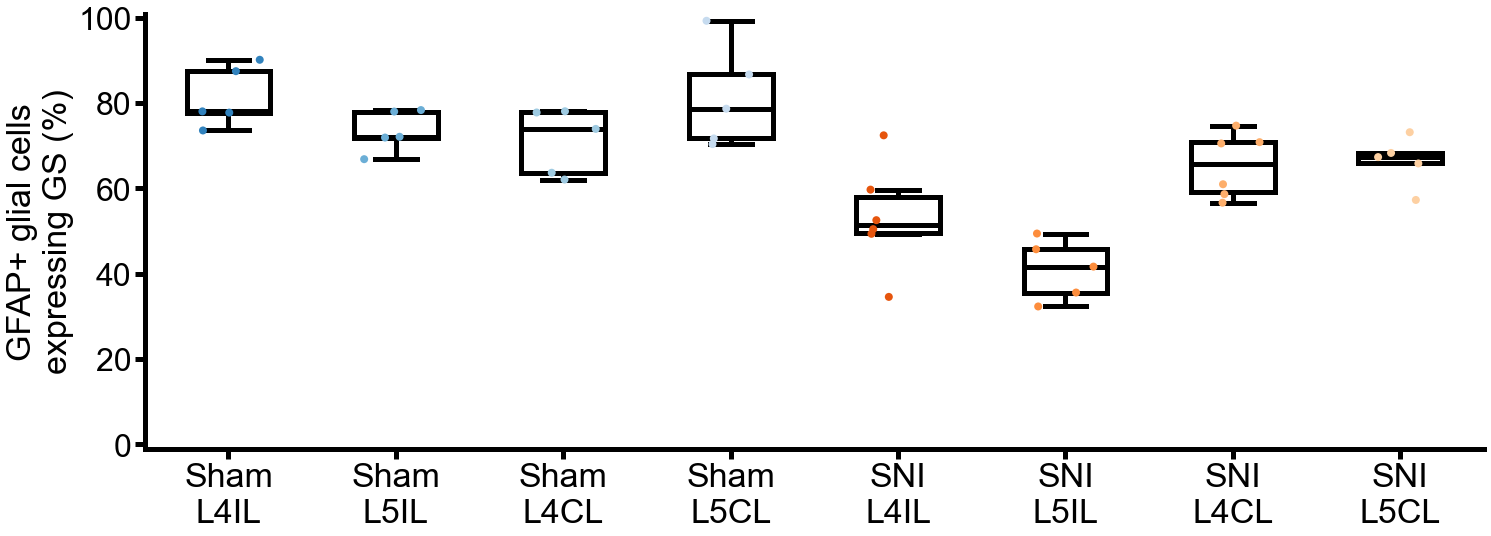

In [18]:
plot_all('gfap_overlaps', 'GFAP+ glial cells\nexpressing GS (%)')

In [19]:
statistic_all('gfap_overlaps')

one-way ANOVA: p-value=0.00000


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,0.0589,0.0016,0.0057,0.0708,0.9935,0.0000,0.0062
Sham L5IL,0.0589,1.0000,0.0214,0.2465,0.5816,0.1461,0.0002,0.3054
Sham L4CL,0.0016,0.0214,1.0000,0.0677,0.0079,0.0043,0.0850,0.0588
Sham L5CL,0.0057,0.2465,0.0677,1.0000,0.0700,0.0243,0.0004,0.8145
SNI L4IL,0.0708,0.5816,0.0079,0.0700,1.0000,0.2073,0.0000,0.0691
SNI L5IL,0.9935,0.1461,0.0043,0.0243,0.2073,1.0000,0.0002,0.0358
SNI L4CL,0.0000,0.0002,0.0850,0.0004,0.0000,0.0002,1.0000,0.0002
SNI L5CL,0.0062,0.3054,0.0588,0.8145,0.0691,0.0358,0.0002,1.0000


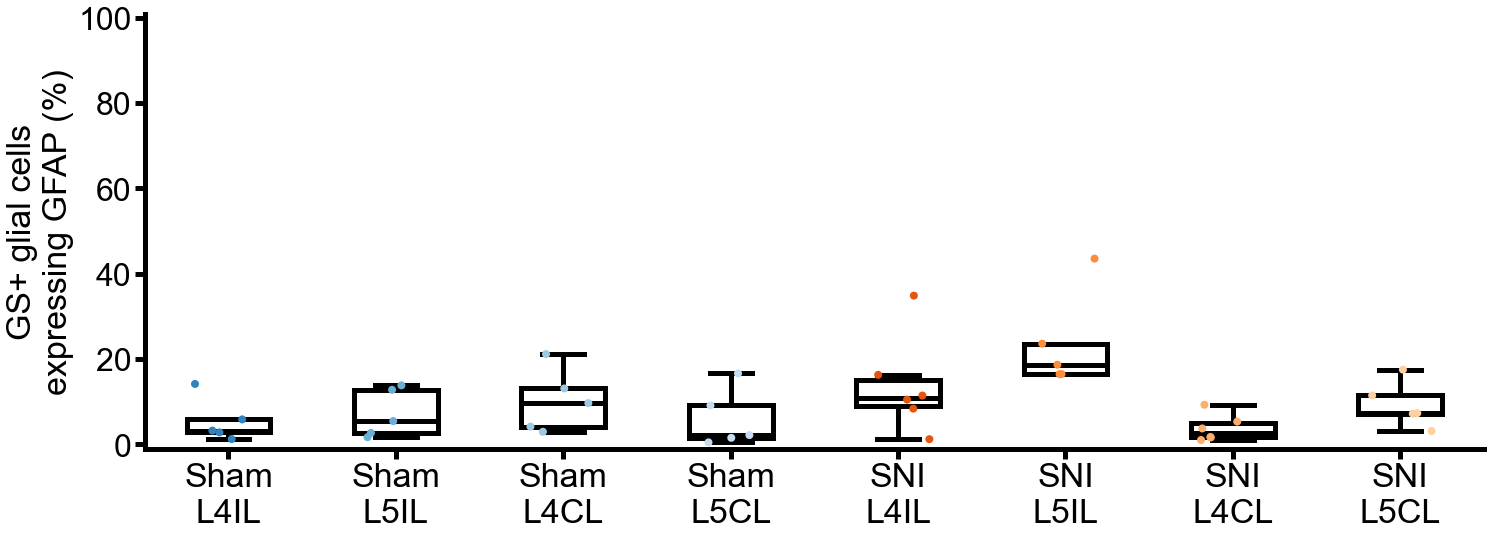

In [21]:
plot_all('gs_overlaps', 'GS+ glial cells\nexpressing GFAP (%)')

In [22]:
statistic_all('gs_overlaps')

Mann Whitney U: p-value=0.02361


,Sham L4IL,Sham L5IL,Sham L4CL,Sham L5CL,SNI L4IL,SNI L5IL,SNI L4CL,SNI L5CL
Sham L4IL,1.0000,1.0000,0.2963,0.8345,0.2353,0.0122,0.6481,0.2101
Sham L5IL,1.0000,1.0000,0.5309,0.5309,0.5228,0.0122,0.2353,0.5309
Sham L4CL,0.2963,0.5309,1.0000,0.2101,0.7842,0.0601,0.0828,1.0000
Sham L5CL,0.8345,0.5309,0.2101,1.0000,0.3153,0.0367,0.9273,0.2963
SNI L4IL,0.2353,0.5228,0.7842,0.3153,1.0000,0.0552,0.0656,0.6481
SNI L5IL,0.0122,0.0122,0.0601,0.0367,0.0552,1.0000,0.0081,0.0367
SNI L4CL,0.6481,0.2353,0.0828,0.9273,0.0656,0.0081,1.0000,0.0828
SNI L5CL,0.2101,0.5309,1.0000,0.2963,0.6481,0.0367,0.0828,1.0000
